### Data Wrangling II

Create an “Academic performance” dataset of students and perform the following operations using Python.

1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution. 

In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Create the dataset (You can also directly create it in excel or google sheets)

data = {
    'Student_ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hank', 'Ivy', 'Jack'],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Age': [18, 19, 18, 20, 19, 18, 20, 19, 18, 20],
    'Math_Score': [-60, 78, np.nan, 88, 95, 70, 89, 82, 91, 77],
    'Science_Score': [90, 85, 88, 92, np.nan, 75, 91, 84, 87, 80],
    'English_Score': [88, 82, 90, 85, 92, 68, 89, 83, 90, 78],
    'Attendance_Percentage': [95, 90, 257, 88, 96, 85, 93, 89, 94, 87]
}

# Convert to DataFrame
df = pd.DataFrame(data)

In [3]:
# Print the dataset
df

,Student_ID,Name,Gender,Age,Math_Score,Science_Score,English_Score,Attendance_Percentage
0,1,Alice,Female,18,-60.0,90.0,88,95
1,2,Bob,Male,19,78.0,85.0,82,90
2,3,Charlie,Male,18,NaN,88.0,90,257
3,4,David,Male,20,88.0,92.0,85,88
4,5,Eva,Female,19,95.0,NaN,92,96
5,6,Frank,Male,18,70.0,75.0,68,85
6,7,Grace,Female,20,89.0,91.0,89,93
7,8,Hank,Male,19,82.0,84.0,83,89
8,9,Ivy,Female,18,91.0,87.0,90,94
9,10,Jack,Male,20,77.0,80.0,78,87


In [4]:
# Save the DataFrame to a CSV file
df.to_csv('academic_performance.csv', index=False)

In [5]:
# Find missing values
df.isnull().sum()

Student_ID               0
Name                     0
Gender                   0
Age                      0
Math_Score               1
Science_Score            1
English_Score            0
Attendance_Percentage    0
dtype: int64

In [6]:
# Fill missing values : 

# new_df.fillna(50) - Fills given value, that is 50 in this case

# Fill mean values (only consider numeric values)
df.fillna(df.mean(numeric_only=True))

,Student_ID,Name,Gender,Age,Math_Score,Science_Score,English_Score,Attendance_Percentage
0,1,Alice,Female,18,-60.000000,90.000000,88,95
1,2,Bob,Male,19,78.000000,85.000000,82,90
2,3,Charlie,Male,18,67.777778,88.000000,90,257
3,4,David,Male,20,88.000000,92.000000,85,88
4,5,Eva,Female,19,95.000000,85.777778,92,96
5,6,Frank,Male,18,70.000000,75.000000,68,85
6,7,Grace,Female,20,89.000000,91.000000,89,93
7,8,Hank,Male,19,82.000000,84.000000,83,89
8,9,Ivy,Female,18,91.000000,87.000000,90,94
9,10,Jack,Male,20,77.000000,80.000000,78,87


<Axes: >

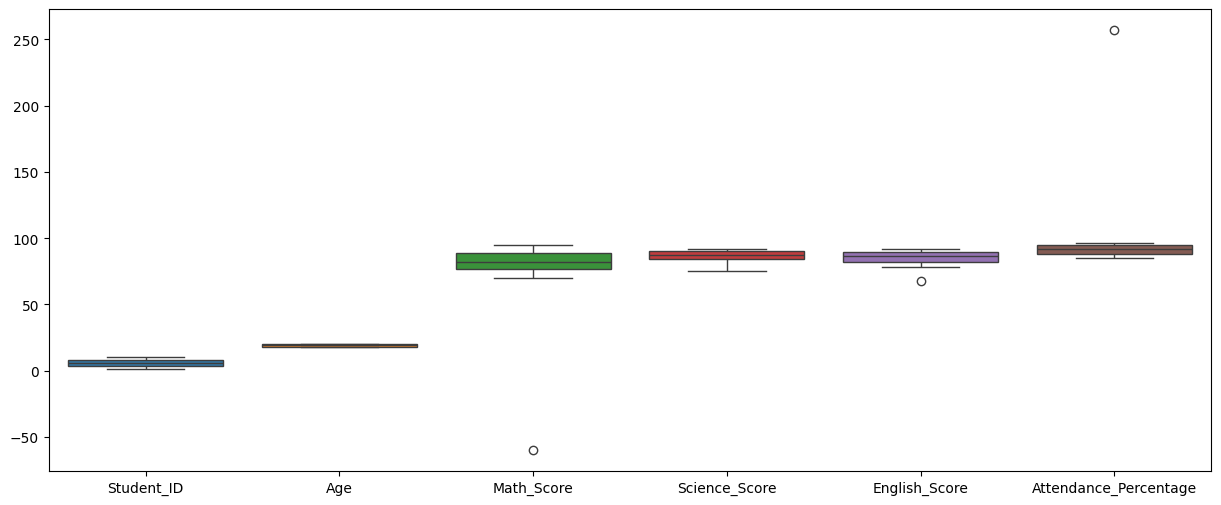

In [7]:
# Check for outliers
plt.figure(figsize=(15,6))
sns.boxplot(df)

In [10]:
# Select only numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate Q1, Q3, and IQR for numeric columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows where any numeric column has an outlier
outlier_mask = ((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)
df_no_outliers = df[~outlier_mask]

# Display the cleaned dataset
df_no_outliers

,Student_ID,Name,Gender,Age,Math_Score,Science_Score,English_Score,Attendance_Percentage
1,2,Bob,Male,19,78.0,85.0,82,90
3,4,David,Male,20,88.0,92.0,85,88
4,5,Eva,Female,19,95.0,NaN,92,96
6,7,Grace,Female,20,89.0,91.0,89,93
7,8,Hank,Male,19,82.0,84.0,83,89
8,9,Ivy,Female,18,91.0,87.0,90,94
9,10,Jack,Male,20,77.0,80.0,78,87


<Axes: >

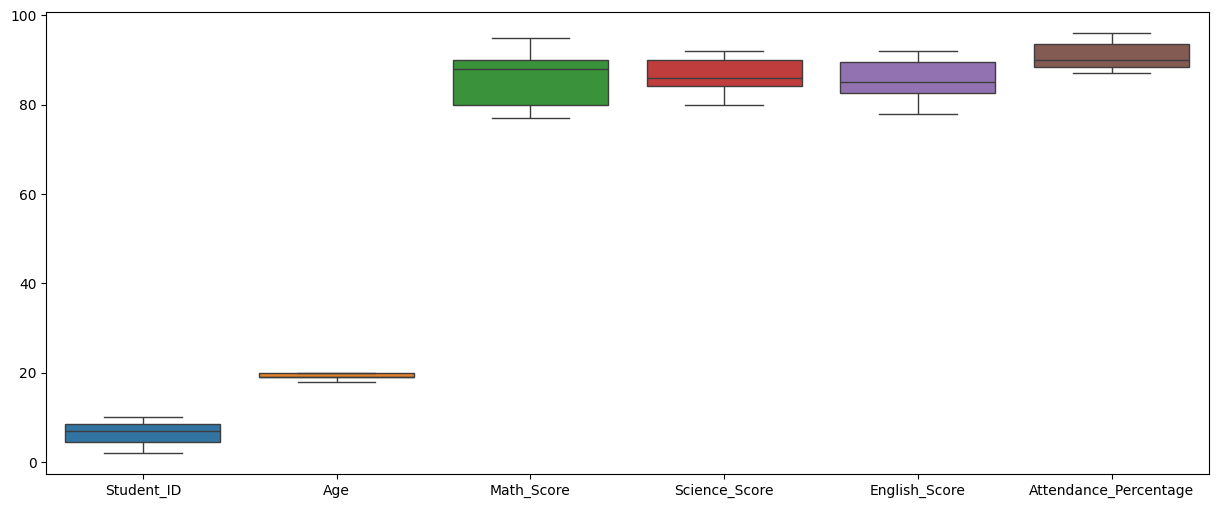

In [11]:
# Check again for outliers
plt.figure(figsize=(15,6))
sns.boxplot(df_no_outliers)